### 1.Name entity recongation
###2.Language detation
##3.sentimance anylis

flow

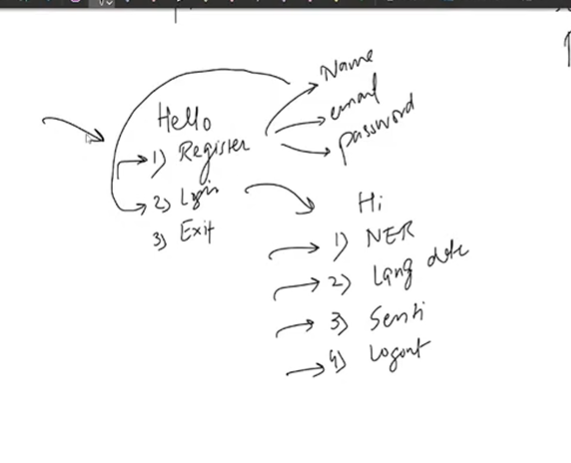

In [1]:
!pip install nlpcloud

In [2]:
import nlpcloud

client = nlpcloud.Client("finetuned-llama-3-70b", "cb93bdea09b9428a88760dc1a9a76c5806c82b04", gpu=True)
client.entities(
    """John Doe started learning Javascript when he was 15 years old. After a couple of years he switched to Python and starter learning low level programming. He is now a Go expert at Google.""",
    searched_entity="programming languages"
)

{'entities': [{'start': 26,
   'end': 36,
   'type': 'programming languages',
   'text': 'Javascript'},
  {'start': 102,
   'end': 108,
   'type': 'programming languages',
   'text': 'Python'},
  {'start': 165, 'end': 167, 'type': 'programming languages', 'text': 'Go'}]}

In [24]:
import nlpcloud
class NLPApp:

  def __init__(self):

    self.__database={}
    self.__first_menu()

  def  __first_menu(self):
    first_input = input("""
    Hiii how would you like to process?
    1.not a member? registation
    2.already a member ? login
    3.exit
    """)

    if first_input == '1':
      self.__register()
    elif first_input == '2':
      self.__login()
    elif first_input == '3':
      exit()
    else:
      print("invalid input")
      self.__first_menu()

  def  __second_menu(self):
    second_input = input("""
    Hiii how would you like to process?
    1.NER
    2.language detaction
    3.sentiment Analysis
    4.logout
    """)

    if second_input == '1':
      self.__ner()
    elif second_input == '2':
      self.__language_detection()
    elif second_input == '3':
      self.__sentiment_analysis()
    else:
      exit()


  def __register(self):
    name = input('enter name')
    email = input('enter email')
    password = input('enter password')
    if email in self.__database:
      print('email alreeady exiest')
    else:
      self.__database[email] = [name,password]
      print('registation succesfully now login')
      print(self.__database)
      self.__first_menu()

  def __login(self):
    email = input('enter email')
    password = input('enter password')
    if email in self.__database:
      if self.__database[email][1] == password:
        print('login succesfully')
        self.__second_menu()
      else:
        print('invalid password')
        self.__login()
    else:
      print('this email is not registed')
      self.__first_menu()

  def __ner(self):
    para = input('enter the paregraph')
    search_term = input('enter the search term')

    client = nlpcloud.Client("finetuned-llama-3-70b", "cb93bdea09b9428a88760dc1a9a76c5806c82b04", gpu=True)
    respons = client.entities(para,searched_entity=search_term)
    print(respons)
    self.__second_menu()

  def __sentiment_analysis(self):
    para = input('enter paragraph')
    client = nlpcloud.Client("finetuned-llama-3-70b", "cb93bdea09b9428a88760dc1a9a76c5806c82b04", gpu=True)
    respons = client.sentiment(para)
    print(respons)
    L = []
    for i in respons['scored_labels']:
      L.append(i['score'])

    index = sorted(list(enumerate(L)),key=lambda x:x[1],reverse=True)[0][0]

    print(respons['scored_labels'][index]['label'])
    self.__second_menu()

  def __language_detection(self):
    para = input('enter paragraph')
    client = nlpcloud.Client("python-langdetect", "cb93bdea09b9428a88760dc1a9a76c5806c82b04", gpu=False)
    respons = client.lang_detection(para)
    print(respons)

In [25]:
obj = NLPApp()


    Hiii how would you like to process?
    1.not a member? registation
    2.already a member ? login
    3.exit
    1
enter namerudra
enter emailrudrabhatt151004@gmail.com
enter password123
registation succesfully now login
{'rudrabhatt151004@gmail.com': ['rudra', '123']}

    Hiii how would you like to process?
    1.not a member? registation
    2.already a member ? login
    3.exit
    2
enter emailrudrabhatt151004@gmail.com
enter password123
login succesfully

    Hiii how would you like to process?
    1.NER
    2.language detaction
    3.sentiment Analysis
    4.logout
    1
enter the paregraphJohn Doe started learning Javascript when he was 15 years old. After a couple of years he switched to Python and starter learning low level programming. He is now a Go expert at Google.
enter the search termprogramming languages


HTTPError: 429 Client Error: Too Many Requests for url: https://api.nlpcloud.io/v1/gpu/finetuned-llama-3-70b/entities: Rate limit: maximum number of requests per hour reached. Please contact support to learn how to increase this limit (if you are on the free plan, we encourage you to subscribe to the pay-as-you-go plan which provides a much higher throughput and many free requests). You can change your plan here: https://nlpcloud.com/home/plans.